In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello p")

Hello p


In [2]:
sp500 = yf.Ticker("^GSPC")

sp500 = sp500.history(period="max")
print(sp500.columns)
print(sp500)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2024-01-03 00:00:00-05:00  4725.069824  4729.290039  4699.709961  4704.810059   
2024-01-04 00:00:00-05:00  4697.419922  4726.779785  4687.529785  4688.680176   
2024-01-05 00:00:00-05:00  4690.569824  4721.490234  4682.109863  4697.240234   
2024-01-08 00:

In [3]:
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000
2024-01-05 00:00:00-05:00,4690.569824,4721.490234,4682.109863,4697.240234,3844370000


In [4]:
df = pd.DataFrame(sp500)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


<Axes: xlabel='Date'>

<Figure size 3000x1500 with 0 Axes>

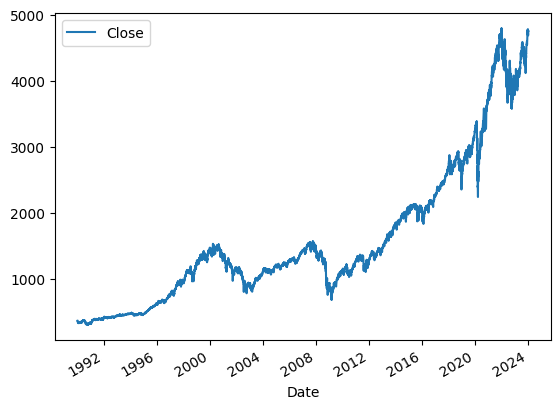

In [5]:
fig = plt.figure(figsize=(10,5),dpi=300)
df.plot.line(y="Close",use_index=True)

In [6]:
df["Tommorow"] = df["Close"].shift(-1)
df["Target"] = (df["Tommorow"]>df["Close"]).astype(int)
df.head()

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [7]:
train = df.iloc[:-100]
test = df.iloc[-100:]

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [9]:
predn = model.predict(test[predictors])
predn

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
from sklearn.metrics import precision_score

precision_score(predn,test["Target"])

0.47368421052631576

In [11]:
predn = pd.Series(predn,index=test.index,name="predn")
result = pd.concat([predn,test['Target']],axis=1)
result

,predn,Target
Date,,
2023-08-17 00:00:00-04:00,1,0
2023-08-18 00:00:00-04:00,1,1
2023-08-21 00:00:00-04:00,1,0
2023-08-22 00:00:00-04:00,1,1
2023-08-23 00:00:00-04:00,1,0
...,...,...
2024-01-03 00:00:00-05:00,0,0
2024-01-04 00:00:00-05:00,0,1
2024-01-05 00:00:00-05:00,0,1


<Axes: xlabel='Date'>

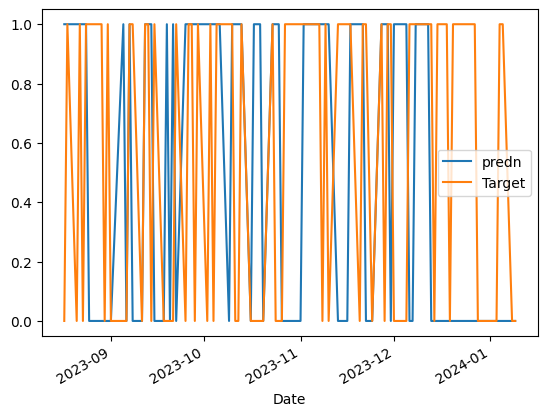

In [12]:
result.plot()
# plt.scatter(result.index,result['Target'],s=60)
# plt.scatter(result.index,result['predn'],s=10)

In [13]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    predn = model.predict(test[predictors])
    predn = pd.Series(predn,index=test.index,name="predn")
    result = pd.concat([predn,test['Target']],axis=1)
    return result

In [14]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]

    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(df,model,predictors)
predictions

,predn,Target
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,0,1
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2024-01-03 00:00:00-05:00,0,0
2024-01-04 00:00:00-05:00,0,1
2024-01-05 00:00:00-05:00,0,1


In [16]:
predictions["predn"].value_counts()

0    3475
1    2596
Name: predn, dtype: int64

In [17]:
precision_score(predictions["Target"],predictions["predn"])

0.5288906009244992

In [18]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"]/rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column,trend_column]

In [19]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,4704.810059,0,0.997162,0.0,0.994206,3.0,1.057911,38.0,1.106224,137.0,1.193872,529.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,4688.680176,0,0.995976,0.0,0.989137,2.0,1.047886,37.0,1.096485,136.0,1.183880,528.0
2024-01-04 00:00:00-05:00,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,4697.240234,1,0.998283,0.0,0.989611,1.0,1.042927,36.0,1.091829,136.0,1.179404,528.0


In [20]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state=1)

In [21]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    predn = model.predict_proba(test[predictors])[:,1]
    predn[predn >= .6] = 1
    predn[predn <= .6] = 0
    predn = pd.Series(predn,index=test.index,name="predn")
    result = pd.concat([predn,test['Target']],axis=1)
    return result

In [22]:
predictions = backtest(df,model,new_predictors)
predictions

,predn,Target
Date,,
2003-11-14 00:00:00-05:00,0.0,0
2003-11-17 00:00:00-05:00,1.0,0
2003-11-18 00:00:00-05:00,1.0,1
2003-11-19 00:00:00-05:00,0.0,0
2003-11-20 00:00:00-05:00,1.0,1
...,...,...
2024-01-02 00:00:00-05:00,0.0,0
2024-01-03 00:00:00-05:00,0.0,0
2024-01-04 00:00:00-05:00,0.0,1


In [23]:
predictions["predn"].value_counts()

0.0    4239
1.0     831
Name: predn, dtype: int64

In [24]:
precision_score(predictions["Target"],predictions["predn"])

0.5728038507821901